### Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style("darkgrid")

### load the data

In [2]:
data = pd.read_csv(r"C:\Users\gaman\OneDrive - IIT Hyderabad\Desktop\epoch-2023-24-common-pool-hackathon\train.csv")
data

,ID,A,B,C,D,E,F,G,H,I,Target
0,1,6.750761,207.254505,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726,1
1,2,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1
2,3,7.638762,178.271636,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627,0
3,4,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0
4,5,8.390501,215.295518,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359,1
...,...,...,...,...,...,...,...,...,...,...,...
2288,2289,NaN,273.255621,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781,1
2289,2290,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2290,2291,NaN,193.926180,14936.50397,7.203401,309.447432,447.450108,12.180626,NaN,4.297914,0
2291,2292,6.380717,266.015410,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


### correlation matrix

,ID,A,B,C,D,E,F,G,H,I,Target
ID,1.000000,0.029217,0.012491,0.012238,0.007653,-0.043376,0.007942,0.016493,0.008464,-0.015096,-0.019365
A,0.029217,1.000000,0.066908,-0.088106,-0.014827,0.024529,0.035385,0.018944,0.011826,-0.034373,0.020477
B,0.012491,0.066908,1.000000,-0.034040,-0.010914,-0.111084,-0.042951,0.007839,-0.028590,-0.015731,0.000692
C,0.012238,-0.088106,-0.034040,1.000000,-0.080593,-0.172176,0.010526,0.007354,-0.017981,0.019843,0.028561
D,0.007653,-0.014827,-0.010914,-0.080593,1.000000,0.050171,-0.024879,-0.028484,0.016391,-0.001527,0.030456
E,-0.043376,0.024529,-0.111084,-0.172176,0.050171,1.000000,-0.007887,0.021291,-0.005291,-0.011838,-0.037269
F,0.007942,0.035385,-0.042951,0.010526,-0.024879,-0.007887,1.000000,0.022428,-0.012154,0.009857,-0.004556
G,0.016493,0.018944,0.007839,0.007354,-0.028484,0.021291,0.022428,1.000000,-0.010326,-0.041119,-0.029224
H,0.008464,0.011826,-0.028590,-0.017981,0.016391,-0.005291,-0.012154,-0.010326,1.000000,-0.030060,-0.009076
I,-0.015096,-0.034373,-0.015731,0.019843,-0.001527,-0.011838,0.009857,-0.041119,-0.030060,1.000000,0.003612


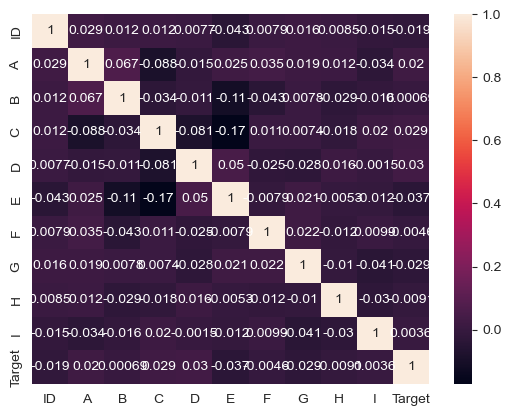

In [3]:
corr = data.corr(method="pearson")
sns.heatmap(corr,annot=True)
data.corr()

### data cleaning

In [4]:
data = data.drop(['ID'],axis=1)
data = data.drop(['B'],axis=1)
data

,A,C,D,E,F,G,H,I,Target
0,6.750761,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726,1
1,6.037428,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1
2,7.638762,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627,0
3,6.090016,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0
4,8.390501,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359,1
...,...,...,...,...,...,...,...,...,...
2288,NaN,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781,1
2289,8.989900,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2290,NaN,14936.50397,7.203401,309.447432,447.450108,12.180626,NaN,4.297914,0
2291,6.380717,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


In [5]:
data.isnull().sum()

A         358
C           0
D           0
E         548
F           0
G           0
H         115
I           0
Target      0
dtype: int64

In [6]:
for i in range(len(data)):
    if math.isnan(data['A'][i]):
        data['A'][i] = data['A'][i-1]

    if math.isnan(data['E'][i]):
        data['E'][i] = data['E'][i-1]

    if math.isnan(data['H'][i]):
          data['H'][i] = data['H'][i-1]

data.isnull().sum()

C:\Users\gaman\AppData\Local\Temp\ipykernel_38660\2631366424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['A'][i] = data['A'][i-1]
C:\Users\gaman\AppData\Local\Temp\ipykernel_38660\2631366424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['E'][i] = data['E'][i-1]
C:\Users\gaman\AppData\Local\Temp\ipykernel_38660\2631366424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['H'][i] = data['H'][i-1]


A         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
Target    0
dtype: int64

### data visualization

<AxesSubplot:>

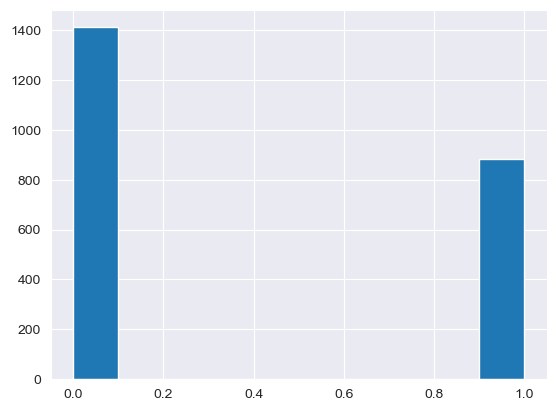

In [7]:
data['Target'].hist()

<AxesSubplot:xlabel='C', ylabel='Count'>

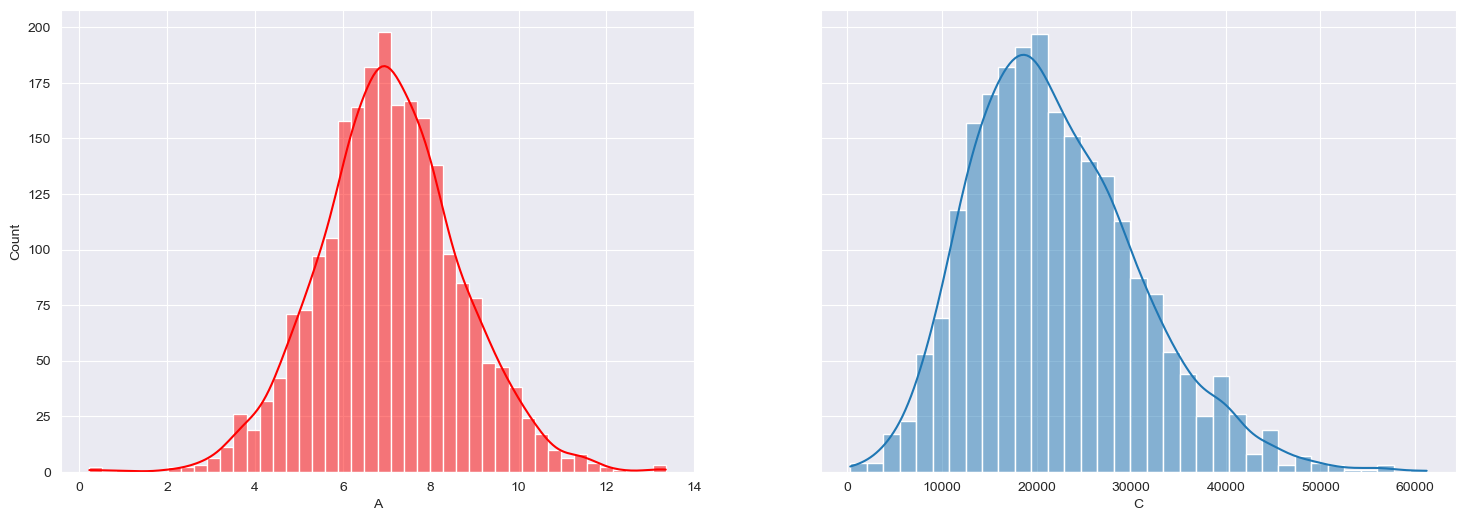

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="A", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="C", kde=True)

<AxesSubplot:xlabel='F', ylabel='Count'>

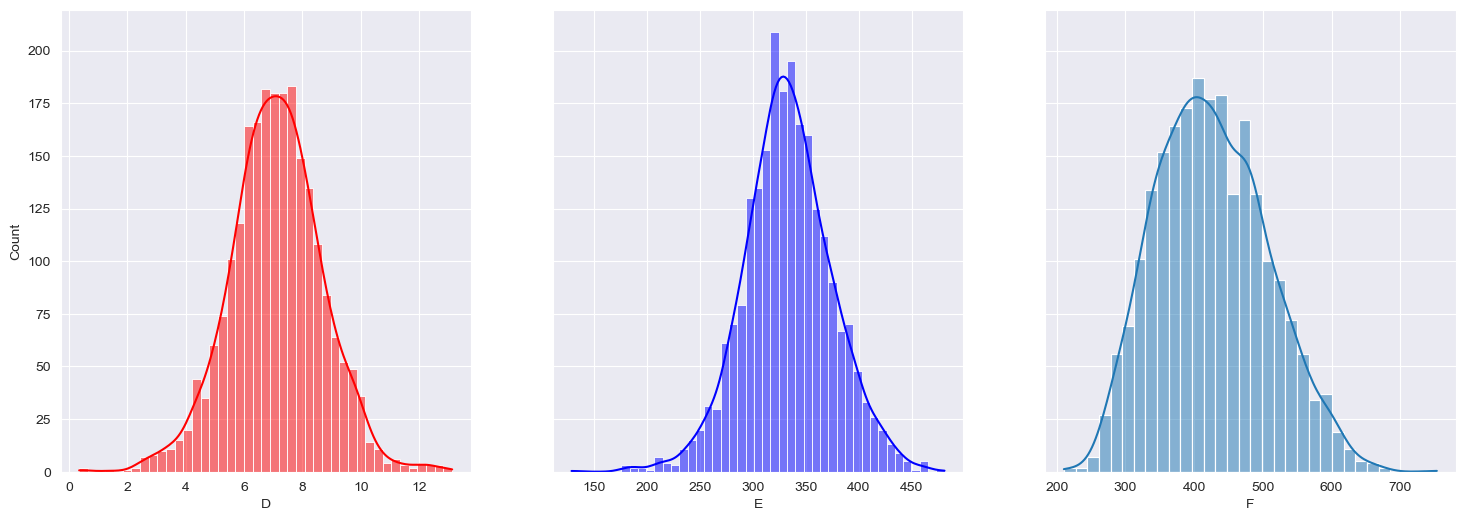

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="D", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="E", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="F", kde=True)

<AxesSubplot:xlabel='I', ylabel='Count'>

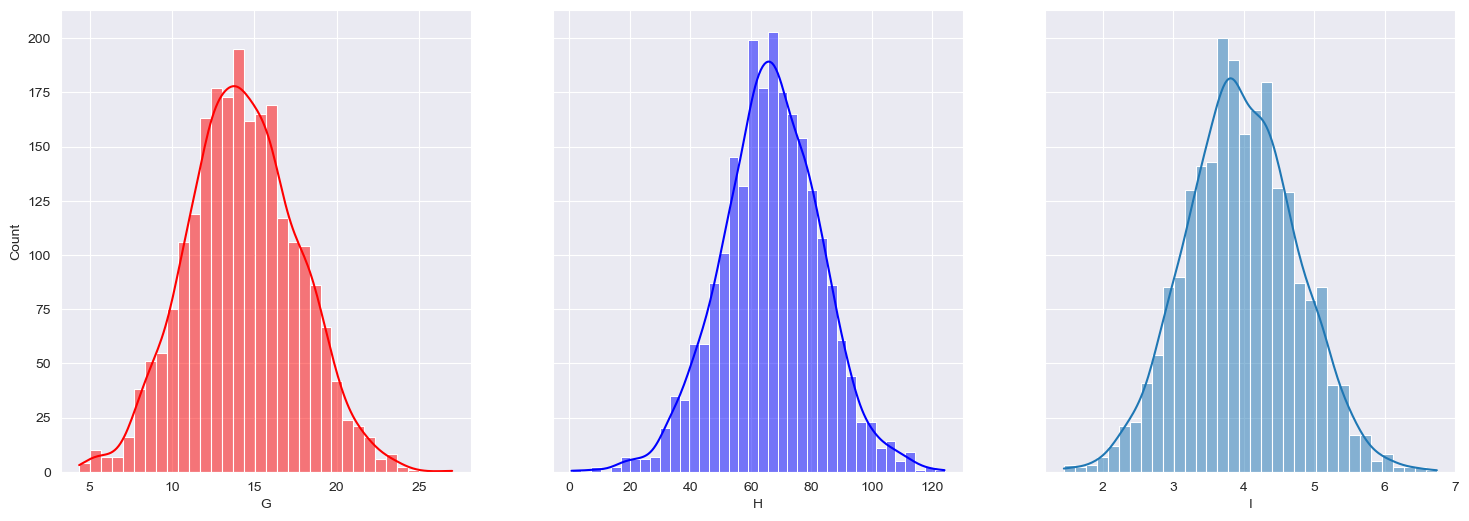

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="G", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="H", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="I", kde=True)

### data preprocessing

In [11]:
x_data = data.iloc[:,:-1]
x_data

,A,C,D,E,F,G,H,I
0,6.750761,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
1,6.037428,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217
2,7.638762,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627
3,6.090016,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522
4,8.390501,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359
...,...,...,...,...,...,...,...,...
2288,6.334163,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781
2289,8.989900,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2290,8.989900,14936.50397,7.203401,309.447432,447.450108,12.180626,55.069304,4.297914
2291,6.380717,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020


In [12]:
for col in x_data :
    x_data[col] = (x_data[col] - x_data[col].mean()) / x_data[col].std()
x_data

,A,C,D,E,F,G,H,I
0,-0.194745,0.185564,0.375341,-0.944204,0.259697,-2.488444,-2.176666,-1.524729
1,-0.641240,-1.019996,0.873051,1.422640,-1.478199,-2.152077,-1.548799,-0.477501
2,0.361079,-0.418052,-0.348472,0.701343,-0.390769,-0.902123,0.940694,0.679925
3,-0.608324,-1.068640,1.392610,-0.363275,-0.201928,-1.063095,-2.172698,-1.312081
4,0.831613,0.569058,-0.344761,-1.206426,0.219426,-0.437497,-1.232860,0.235804
...,...,...,...,...,...,...,...,...
2288,-0.455505,2.546336,0.832382,-2.384281,0.742138,0.121137,-0.879193,0.202997
2289,1.206794,-0.688160,-0.507296,-0.484554,-0.437473,-1.319635,-0.701929,0.830266
2290,1.206794,-0.799606,0.066535,-0.568178,0.269026,-0.635656,-0.701929,0.425057
2291,-0.426366,-0.085106,-1.421140,0.579112,-0.836611,3.809092,-0.404859,0.725320


In [13]:
y_data = data.iloc[:,-1]
y_data

0       1
1       1
2       0
3       0
4       1
       ..
2288    1
2289    1
2290    0
2291    0
2292    0
Name: Target, Length: 2293, dtype: int64

### splitting the data into train and validation

In [14]:
x_train,x_val = np.split(x_data.sample(frac = 1),[int(0.8*len(data))])
y_train,y_val = np.split(y_data.sample(frac = 1),[int(0.8*len(data))])

In [15]:
x_train=x_train.reset_index()
x_train=x_train.drop(['index'],axis=1)

x_val=x_val.reset_index()
x_val=x_val.drop(['index'],axis=1)

y_train=y_train.reset_index()
y_train=y_train.drop(['index'],axis=1)

y_val=y_val.reset_index()
y_val=y_val.drop(['index'],axis=1)

### prior probability

In [16]:
def prior_prob(y_train,label_num):
    a = y_train.value_counts()
    if label_num == 0 :
        return a[0]/(a[0]+a[1])
    else:
        return a[1]/(a[0]+a[1])

### guassian probability distribution

In [17]:
def guassian_pdf(x_train,x,col,label_num,y_train):
    x_train = x_train[y_train['Target'] == label_num]
    #print(x_train)
    mean = x_train[col].mean()
    sd = x_train[col].std()
    return (1 / (np.sqrt(2 * np.pi) * sd)) *  np.exp(-((x-mean)**2 / (2 * sd**2 )))

### likelihood probability

In [18]:
def likelihood(x_train,x_val,row_num,label_num,y_train):
    columns = x_train.columns
    ans = 1
    for i in range(len(x_val.loc[row_num])):
        ans = ans * guassian_pdf(x_train, x_val.loc[row_num][i],columns[i],label_num,y_train)
    return ans

### naive bayes

In [19]:
def naive_bayes(x_train,y_train,x_val):
    y_pred = []
    for i in range(len(x_val)):
        pri_0 = prior_prob(y_train,0)
        like_0 = likelihood(x_train,x_val,i,0,y_train)
        
        pri_1 = prior_prob(y_train,1)
        like_1 = likelihood(x_train,x_val,i,1,y_train)
        
        if(pri_0 * like_0 >= pri_1 * like_1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

### predictions for validation data

In [20]:
y_pred = naive_bayes(x_train,y_train,x_val)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score 

accuracy_naivebayes = accuracy_score(y_val,y_pred)*100
print(accuracy_naivebayes)

58.82352941176471


### predicting the labels for test data

In [22]:
test_data = pd.read_csv(r"C:\Users\gaman\OneDrive - IIT Hyderabad\Desktop\epoch-2023-24-common-pool-hackathon\test.csv")

test_data = test_data.drop(['ID'],axis=1)
test_data = test_data.drop(['B'],axis=1)

test_data.isnull().sum()

A    133
C      0
D      0
E    233
F      0
G      0
H     47
I      0
dtype: int64

In [23]:
for i in range(len(test_data)):
    if math.isnan(test_data['A'][i]):
        test_data['A'][i] = test_data['A'][i-1]

    if math.isnan(test_data['E'][i]):
        test_data['E'][i] = test_data['E'][i-1]

    if math.isnan(test_data['H'][i]):
        test_data['H'][i] = test_data['H'][i-1]

test_data.isnull().sum()

A    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
dtype: int64

In [24]:
for col in test_data :
    test_data[col] = (test_data[col] - test_data[col].mean()) / test_data[col].std()
test_data

,A,C,D,E,F,G,H,I
0,1.573662,-1.571639,-1.402501,1.237718,-0.426178,-0.555139,-0.774534,-0.990311
1,0.861569,-1.330156,-0.493465,-0.687354,1.948066,-0.754721,-0.142851,-1.850029
2,0.861569,1.634433,-0.052793,-0.687354,-0.162987,0.501415,0.353628,-1.961710
3,-0.192735,0.247442,0.959777,0.343341,0.613262,0.717007,1.709548,0.392756
4,-0.192735,-0.716243,-0.510473,-0.544701,-0.761005,-1.188082,-0.408028,0.944921
...,...,...,...,...,...,...,...,...
978,-0.671535,0.461010,-0.065064,0.898617,-1.018329,0.059957,0.421343,-0.333352
979,-0.218168,-0.472820,0.675910,0.898617,-0.846236,-1.148870,-0.561668,0.468031
980,0.098429,0.124587,1.460297,-0.080878,0.272003,0.064997,0.249832,-0.505556
981,0.169200,-0.260480,0.781370,1.253507,0.013589,-0.340346,-0.237614,-0.025934


In [25]:
df = pd.DataFrame(index=range(983), columns=range(2))

df.columns = ['ID','Target']
for i in range(len(test_data)):
    df['ID'][i]=i+2294
y_pred_test = naive_bayes(x_train,y_train,test_data)
df['Target'] = y_pred_test

In [26]:
df.to_csv('test_results.csv',index = False)